In [50]:
import h5py
import numpy as np
import glob2
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set(style="ticks")

In [149]:
# All params
Q_list = [0.15]
W_list = [0.15]
D_list = [0.6]
T_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
wb_list = [5.0]
decay_list = [18.0]

seed_list = list(np.arange(0,25,1))

## Plot distance

In [180]:
with open('distance_data_mean.json') as f:
    distance_data = json.load(f)
    
len(distance_data)

6

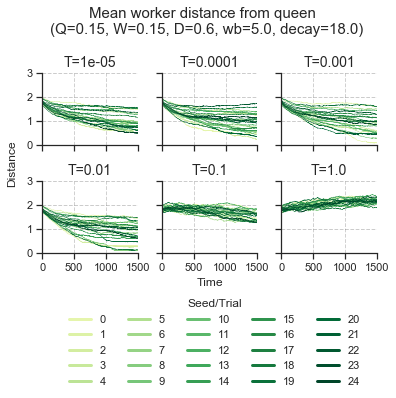

In [182]:
plt.rcParams["font.family"] = "Arial"
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(6, 4))

colors = plt.cm.YlGn(np.linspace(0.2, 1, len(seed_list)))

# length_data = 501
axes = axes.flatten()
for data_i, (ax, data) in enumerate(zip(axes, distance_data)):
    for trial_i, trials in enumerate(distance_data[data]):
        trials_list = distance_data[data][trials]
        
        ax.plot(trials_list, label=f"{seed_list[trial_i]}",
               color=colors[trial_i], linewidth=0.5)       
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(f"T={T_list[data_i]}", fontsize=14)
        ax.xaxis.grid(b=True, color='k', alpha=0.2, linestyle='--', linewidth=1)
        ax.yaxis.grid(b=True, color=(0,0,0), alpha=0.2, linestyle='--', linewidth=1)
        ax.yaxis.zorder = -1
        plt.ylim(0, 3)
        plt.xlim(0, len(trials_list))
        plt.xticks(np.arange(0, len(trials_list)+1, 500))

fig.suptitle(f"Mean worker distance from queen \n (Q={Q_list[0]}, W={W_list[0]}, D={D_list[0]}, wb={wb_list[0]}, decay={decay_list[0]})", fontsize=15)
fig.subplots_adjust(top=0.75)   

# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
leg = ax.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.5),
          fancybox=True, shadow=True, ncol=5, title="Seed/Trial")  
for line in leg.get_lines():
    line.set_linewidth(3)
    
# Add x and y labels for all
ax = fig.add_subplot(111, frameon=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Time', labelpad=25) 
ax.set_ylabel('Distance', labelpad=25)

fig.subplots_adjust(wspace=0.25, hspace=0.5)

plt.savefig("sweep_t=1500_mean.pdf", bbox_inches='tight')
